In [14]:
#!wget ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz
!wget ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/README

--2022-02-08 17:29:41--  http://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/README
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: 'README'

    [ <=>                                   ] 11,994      --.-K/s   in 0s      

2022-02-08 17:29:41 (94.9 MB/s) - 'README' saved [11994]



In [8]:
!mv Homo_sapiens.GRCh38.85.gff3.gz ../datasets

In [13]:
!zcat ../datasets/Homo_sapiens.GRCh38.85.gff3.gz | tail -n 10 # what is zcat command?

Y	havana	gene	26626520	26627159	.	-	.	ID=gene:ENSG00000231514;Name=FAM58CP;biotype=processed_pseudogene;description=family with sequence similarity 58 member C%2C pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38436];gene_id=ENSG00000231514;havana_gene=OTTHUMG00000036813;havana_version=1;logic_name=havana;version=1
Y	havana	processed_pseudogene	26626520	26627159	.	-	.	ID=transcript:ENST00000435741;Parent=gene:ENSG00000231514;Name=FAM58CP-001;biotype=processed_pseudogene;havana_transcript=OTTHUMT00000089409;havana_version=1;tag=basic;transcript_id=ENST00000435741;transcript_support_level=NA;version=1
Y	havana	exon	26626520	26627159	.	-	.	Parent=transcript:ENST00000435741;Name=ENSE00001616687;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001616687;rank=1;version=1
###
Y	.	biological_region	26626966	26627137	0.994	-	.	external_name=rank %3D 1;logic_name=firstef
Y	.	biological_region	26627457	26628186	0.997	+	.	external_name=rank %3D 1;logic_name=firstef
Y	havana	gene	56855

In [15]:
!mv README ../datasets

## Action item for class: Download the sequence and the README file, save in the relevant folder and inspect it: What information do you see? How many columns will be in the original dataframe?

According to the README, ## means the metadata is stable, while #! means it’s experimental.

Human readable comments are supposed to be after a single #. For simplicity, we will treat all lines starting with # as comments, and simply ignore them during our analysis.

In [ ]:
# some lines in the file we can see

##gff-version   3
##sequence-region   1 1 248956422
##sequence-region   10 1 133797422
##sequence-region   11 1 135086622
##sequence-region   12 1 133275309

##sequence-region   MT 1 16569
##sequence-region   X 1 156040895
##sequence-region   Y 2781480 56887902
#!genome-build  GRCh38.p7
#!genome-version GRCh38
#!genome-date 2013-12
#!genome-build-accession NCBI:GCA_000001405.22
#!genebuild-last-updated 2016-06

## Action item for class: What features (column names) do you think could be informative and what are trivial?

This is the annotation of the first chromosome with a seqid of 1, which starts from the first base to the 24,895,622nd base, i.e., the first chromosome is ~ 25 million bases long.

Our analysis won’t need information from the three columns with a value of . (i.e. score, strand, and phase), so we can simply ignore them for now.

The last attributes column says Chromosome 1 also has three alias names, namely CM000663.2, chr1, and NC_000001.11. That’s basically what a GFF3 file looks like, but we won’t inspect them line by line, so it’s time to load the whole file into Pandas.

Pandas is good fit for dealing with GFF3 format because it is a tab-delimited file, and Pandas has very good support for reading CSV-like files.


In [2]:
import pandas as pd
pd.__version__ # good idea to report it when comparing code from different times
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'] #specified in README file
df = pd.read_csv('../datasets/Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

In [21]:
df.head(10)

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000..."
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine
5,1,.,biological_region,10681,10688,0.999,-,.,logic_name=eponine
6,1,.,biological_region,10707,10716,0.999,+,.,logic_name=eponine
7,1,.,biological_region,10708,10718,0.999,-,.,logic_name=eponine
8,1,.,biological_region,10735,10747,0.999,-,.,logic_name=eponine
9,1,.,biological_region,10737,10744,0.999,+,.,logic_name=eponine


In [22]:
# Next, let’s get some basic information about this dataframe with the .info method.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601849 entries, 0 to 2601848
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   seqid       object
 1   source      object
 2   type        object
 3   start       int64 
 4   end         int64 
 5   score       object
 6   strand      object
 7   phase       object
 8   attributes  object
dtypes: int64(2), object(7)
memory usage: 178.7+ MB


In [23]:
df.describe() #any useful?

,start,end
count,2.601849e+06,2.601849e+06
mean,7.409822e+07,7.410290e+07
std,5.584042e+07,5.584077e+07
min,1.000000e+00,6.470000e+02
25%,3.159071e+07,3.159528e+07
50%,5.927295e+07,5.928351e+07
75%,1.100164e+08,1.100191e+08
max,2.489450e+08,2.489564e+08


In [24]:
!gunzip -c ../datasets/Homo_sapiens.GRCh38.85.gff3.gz > /tmp/tmp.gff3 && du -s /tmp/tmp.gff3

410932	/tmp/tmp.gff3


In [25]:
!gunzip -h

Usage: gzip [OPTION]... [FILE]...
Compress or uncompress FILEs (by default, compress FILES in-place).

Mandatory arguments to long options are mandatory for short options too.

  -c, --stdout      write on standard output, keep original files unchanged
  -d, --decompress  decompress
  -f, --force       force overwrite of output file and compress links
  -h, --help        give this help
  -l, --list        list compressed file contents
  -L, --license     display software license
  -n, --no-name     do not save or restore the original name and time stamp
  -N, --name        save or restore the original name and time stamp
  -q, --quiet       suppress all warnings
  -r, --recursive   operate recursively on directories
  -S, --suffix=SUF  use suffix SUF on compressed files
  -t, --test        test compressed file integrity
  -v, --verbose     verbose mode
  -V, --version     display version number
  -1, --fast        compress faster
  -9, --best        compress better
    --rsyncable   Ma

In [26]:
!gunzip -c ../datasets/Homo_sapiens.GRCh38.85.gff3.gz > /tmp/tmp.gff3 && du -sh /tmp/tmp.gff3

402M	/tmp/tmp.gff3


In [27]:
# Now, let’s see what the first column seqid is all about

df.seqid.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000008.2', 'GL000009.2', 'GL000194.1', 'GL000195.1',
       'GL000205.2', 'GL000208.1', 'GL000213.1', 'GL000214.1',
       'GL000216.2', 'GL000218.1', 'GL000219.1', 'GL000220.1',
       'GL000221.1', 'GL000224.1', 'GL000225.1', 'GL000226.1',
       'KI270302.1', 'KI270303.1', 'KI270304.1', 'KI270305.1',
       'KI270310.1', 'KI270311.1', 'KI270312.1', 'KI270315.1',
       'KI270316.1', 'KI270317.1', 'KI270320.1', 'KI270322.1',
       'KI270329.1', 'KI270330.1', 'KI270333.1', 'KI270334.1',
       'KI270335.1', 'KI270336.1', 'KI270337.1', 'KI270338.1',
       'KI270340.1', 'KI270362.1', 'KI270363.1', 'KI270364.1',
       'KI270366.1', 'KI270371.1', 'KI270372.1', 'KI270373.1',
       'KI270374.1', 'KI270375.1', 'KI270376.1', 'KI270378.1',
       'KI270379.1', 'KI270381.1', 'KI270382.1', 'KI270383.1',
       'KI270384.1', 'KI270385.1', 'KI270386

In [28]:
df.seqid.unique().shape #when will this not work?

#df['seqid'].unique().shape

(194,)

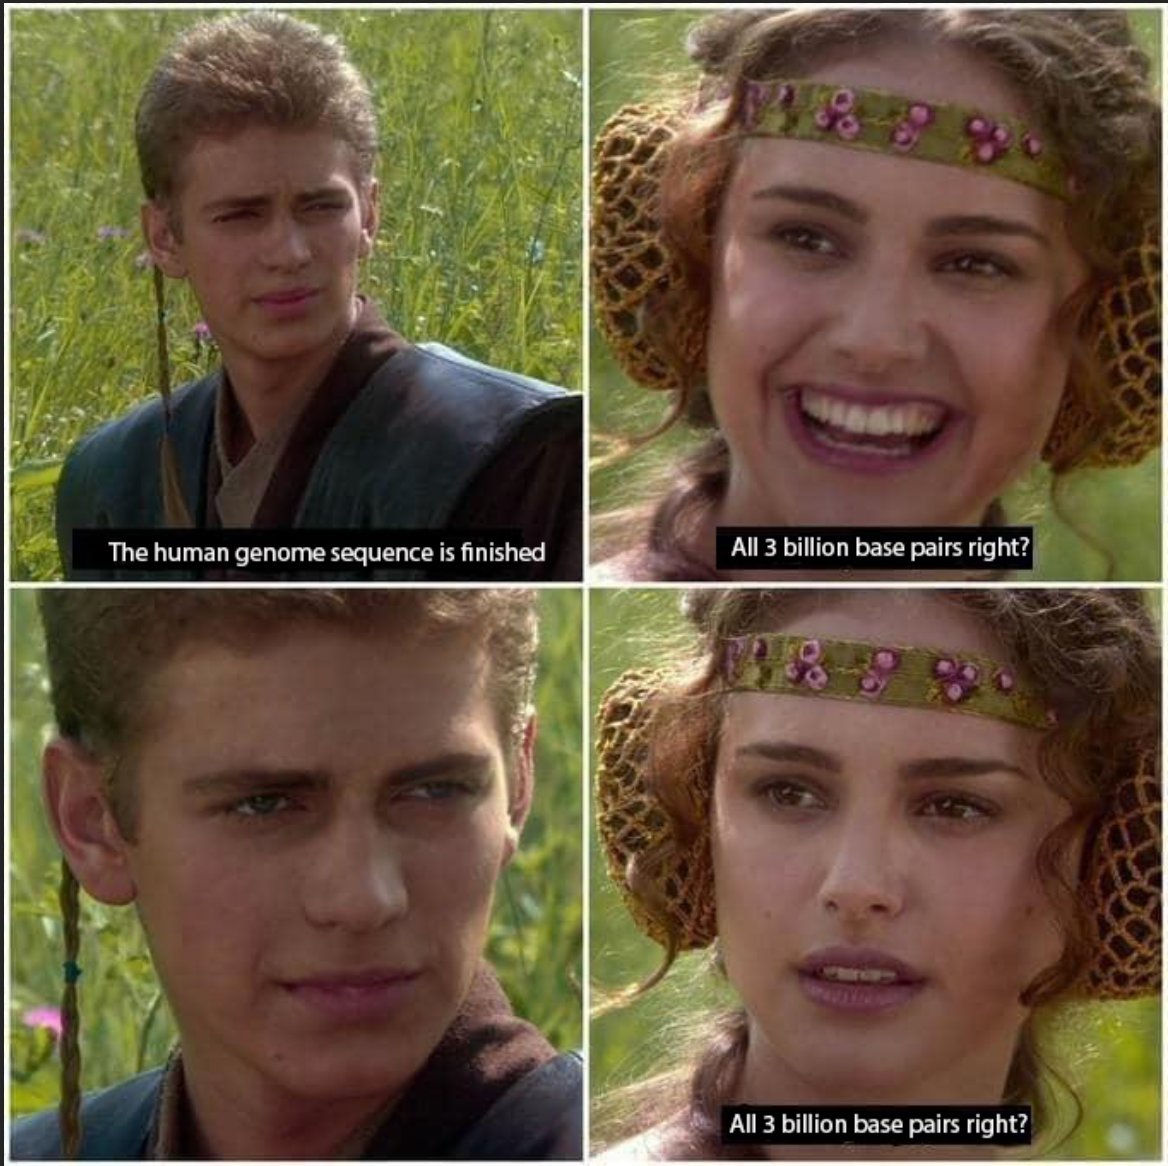

Although the first human genome draft came out more than 15 years ago, the current human genome is still incomplete. 

Why? 

The difficulty in assembling these sequences is in large part due to complex repetitive regions in the genome.

Now it is time to take a look at the source column.

The README says that the source is a free text qualifier intended to describe the algorithm or operating procedure that generated this feature.

In [29]:
df.source.value_counts()

havana            1441093
ensembl_havana     745065
ensembl            228212
.                  182510
mirbase              4701
GRCh38                194
insdc                  74
Name: source, dtype: int64

# How Much of the Genome Is Incomplete?

The information about each entire chromosome is in the entries from source GRCh38, so let’s first filter out the rest, and assign the filtered result to a new variable gdf.

In [3]:
gdf_ori = df[df.source == 'GRCh38'] #only returning those entries that match to GRCh38
gdf_ori.shape

(194, 9)

In [4]:
gdf_ori.sample(10) #randomly select 10 entries

# what was the other method we learned to randomly sample values?

,seqid,source,type,start,end,score,strand,phase,attributes
328938,11,GRCh38,chromosome,1,135086622,.,.,.,"ID=chromosome:11;Alias=CM000673.2,chr11,NC_000..."
2511493,KI270387.1,GRCh38,supercontig,1,1537,.,.,.,ID=supercontig:KI270387.1;Alias=chrUn_KI270387...
2511511,KI270423.1,GRCh38,supercontig,1,981,.,.,.,ID=supercontig:KI270423.1;Alias=chrUn_KI270423...
2511567,KI270548.1,GRCh38,supercontig,1,1599,.,.,.,ID=supercontig:KI270548.1;Alias=chrUn_KI270548...
2511465,KI270322.1,GRCh38,supercontig,1,21476,.,.,.,ID=supercontig:KI270322.1;Alias=chrUn_KI270322...
2511492,KI270386.1,GRCh38,supercontig,1,1788,.,.,.,ID=supercontig:KI270386.1;Alias=chrUn_KI270386...
2511555,KI270517.1,GRCh38,supercontig,1,3253,.,.,.,ID=supercontig:KI270517.1;Alias=chrUn_KI270517...
2511507,KI270418.1,GRCh38,supercontig,1,2145,.,.,.,ID=supercontig:KI270418.1;Alias=chrUn_KI270418...
2511573,KI270584.1,GRCh38,supercontig,1,4513,.,.,.,ID=supercontig:KI270584.1;Alias=chrUn_KI270584...
2511548,KI270508.1,GRCh38,supercontig,1,1951,.,.,.,ID=supercontig:KI270508.1;Alias=chrUn_KI270508...


In [116]:
gdf = gdf_ori.copy() # let's make a copy and refrain from using the original dataframe

#making a new column 'length', storing length information for each seqid entry
gdf['length'] = gdf.end - gdf.start + 1 
gdf.head()

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000...",248956422
235068,10,GRCh38,chromosome,1,133797422,.,.,.,"ID=chromosome:10;Alias=CM000672.2,chr10,NC_000...",133797422
328938,11,GRCh38,chromosome,1,135086622,.,.,.,"ID=chromosome:11;Alias=CM000673.2,chr11,NC_000...",135086622
483370,12,GRCh38,chromosome,1,133275309,.,.,.,"ID=chromosome:12;Alias=CM000674.2,chr12,NC_000...",133275309
634486,13,GRCh38,chromosome,1,114364328,.,.,.,"ID=chromosome:13;Alias=CM000675.2,chr13,NC_000...",114364328


Here, we first made a copy of gdf with .copy(). Otherwise, the original gdf is just a slice of df, and modifying it directly would result in [SettingWithCopyWarning](https://www.dataquest.io/blog/settingwithcopywarning/).

In [117]:
# We then calculate the length of each entry and add it back to gdf as a new column named “length”. 
#The total length turns out to be about 3.1 billion, 
#and the fraction of unassembled sequences is about 0.37%.

gdf.length.sum()

3096629726

In [98]:
# First, we create a list of strings that covers all seqids of well assembled sequences, 
# which are all chromosomes and mitochondria. 
# We then use the isin method to filter all entries whose seqid are in the chrs list.
chrs = [str(_) for _ in range(1, 23)] + ['X', 'Y', 'MT']
chrs

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 'X',
 'Y',
 'MT']

In [48]:
#gdf.seqid.isin(chrs) # we want to know the quantity of those that return False

gdf[-gdf.seqid.isin(chrs)] #how many? 169

#gdf[gdf.seqid.isin(chrs)].length.sum() / gdf.length.sum()

,seqid,source,type,start,end,score,strand,phase,attributes,length
2510747,GL000008.2,GRCh38,supercontig,1,209709,.,.,.,ID=supercontig:GL000008.2;Alias=chr4_GL000008v...,209709
2510751,GL000009.2,GRCh38,supercontig,1,201709,.,.,.,ID=supercontig:GL000009.2;Alias=chr14_GL000009...,201709
2510760,GL000194.1,GRCh38,supercontig,1,191469,.,.,.,ID=supercontig:GL000194.1;Alias=chr14_GL000194...,191469
2510794,GL000195.1,GRCh38,supercontig,1,182896,.,.,.,ID=supercontig:GL000195.1;Alias=chrUn_GL000195...,182896
2510820,GL000205.2,GRCh38,supercontig,1,185591,.,.,.,ID=supercontig:GL000205.2;Alias=chr17_GL000205...,185591
...,...,...,...,...,...,...,...,...,...,...
2513955,KI270753.1,GRCh38,supercontig,1,62944,.,.,.,ID=supercontig:KI270753.1;Alias=chrUn_KI270753...,62944
2513974,KI270754.1,GRCh38,supercontig,1,40191,.,.,.,ID=supercontig:KI270754.1;Alias=chrUn_KI270754...,40191
2513996,KI270755.1,GRCh38,supercontig,1,36723,.,.,.,ID=supercontig:KI270755.1;Alias=chrUn_KI270755...,36723
2513997,KI270756.1,GRCh38,supercontig,1,79590,.,.,.,ID=supercontig:KI270756.1;Alias=chrUn_KI270756...,79590


In [47]:
gdf[(gdf['type'] == 'supercontig')]

,seqid,source,type,start,end,score,strand,phase,attributes,length
2510747,GL000008.2,GRCh38,supercontig,1,209709,.,.,.,ID=supercontig:GL000008.2;Alias=chr4_GL000008v...,209709
2510751,GL000009.2,GRCh38,supercontig,1,201709,.,.,.,ID=supercontig:GL000009.2;Alias=chr14_GL000009...,201709
2510760,GL000194.1,GRCh38,supercontig,1,191469,.,.,.,ID=supercontig:GL000194.1;Alias=chr14_GL000194...,191469
2510794,GL000195.1,GRCh38,supercontig,1,182896,.,.,.,ID=supercontig:GL000195.1;Alias=chrUn_GL000195...,182896
2510820,GL000205.2,GRCh38,supercontig,1,185591,.,.,.,ID=supercontig:GL000205.2;Alias=chr17_GL000205...,185591
...,...,...,...,...,...,...,...,...,...,...
2513955,KI270753.1,GRCh38,supercontig,1,62944,.,.,.,ID=supercontig:KI270753.1;Alias=chrUn_KI270753...,62944
2513974,KI270754.1,GRCh38,supercontig,1,40191,.,.,.,ID=supercontig:KI270754.1;Alias=chrUn_KI270754...,40191
2513996,KI270755.1,GRCh38,supercontig,1,36723,.,.,.,ID=supercontig:KI270755.1;Alias=chrUn_KI270755...,36723
2513997,KI270756.1,GRCh38,supercontig,1,79590,.,.,.,ID=supercontig:KI270756.1;Alias=chrUn_KI270756...,79590


In [42]:
# A minus sign (-) is added to the beginning of the index to reverse the selection, 
# because we actually want everything that is not in the list 
# (in this case, we want the unassembled ones starting with KI and GL)
gdf[-gdf.seqid.isin(chrs)].length.sum() / gdf.length.sum()

0.0037021917421198327

In [43]:
# Note: Since the assembled and unassembled sequences are distinguished by the type column, 
# the last line can alternatively be rewritten as follows to obtain the same results.

gdf[(gdf['type'] == 'supercontig')].length.sum() / gdf.length.sum()


0.0037021917421198327

In [46]:
gdf[(gdf['type'] == 'supercontig')].length.sum()

11464317

# How Many Genes Are There?

Here we focus on the entries from source ensembl, havana and ensembl_havana since they’re where the majority of the annotation entries belong. There is only 194 entries for source GRCh38.

In [8]:
edf = df[df.source.isin(['ensembl', 'havana', 'ensembl_havana'])]
edf.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes
2519321,X,havana,exon,13708721,13708817,.,+,.,Parent=transcript:ENST00000243325;Name=ENSE000...
1272405,19,havana,three_prime_UTR,19305849,19306076,.,-,.,Parent=transcript:ENST00000591350
2130047,6,havana,exon,43774341,43774392,.,+,.,Parent=transcript:ENST00000372077;Name=ENSE000...
314127,10,ensembl,exon,114272740,114272934,.,+,.,Parent=transcript:ENST00000603594;Name=ENSE000...
1364165,19,ensembl_havana,exon,58549737,58549860,.,+,.,Parent=transcript:ENST00000253024;Name=ENSE000...
2163150,6,ensembl_havana,exon,116426574,116426827,.,+,.,Parent=transcript:ENST00000452085;Name=ENSE000...
1959542,4,havana,three_prime_UTR,183649451,183649568,.,-,.,Parent=transcript:ENST00000510702
2216139,7,havana,exon,26372491,26372746,.,+,.,Parent=transcript:ENST00000462993;Name=ENSE000...
2522051,X,havana,exon,18104551,18104644,.,-,.,Parent=transcript:ENST00000453902;Name=ENSE000...
2414623,8,ensembl,CDS,144440351,144440429,.,-,0,ID=CDS:ENSP00000484162;Parent=transcript:ENST0...


In [50]:
edf.type.value_counts()

exon                             1180596
CDS                               704604
five_prime_UTR                    142387
three_prime_UTR                   133938
transcript                         96375
gene                               42470
processed_transcript               28228
aberrant_processed_transcript      26944
NMD_transcript_variant             13761
lincRNA                            13247
processed_pseudogene               10722
lincRNA_gene                        7533
pseudogene                          3049
RNA                                 2221
snRNA                               1909
snRNA_gene                          1909
snoRNA                               956
snoRNA_gene                          944
pseudogenic_transcript               737
rRNA_gene                            549
rRNA                                 549
miRNA                                302
V_gene_segment                       216
J_gene_segment                       158
VD_gene_segment 

In [71]:
edf.head()

,seqid,source,type,start,end,score,strand,phase,attributes
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...
17,1,havana,processed_transcript,11869,14409,.,+,.,ID=transcript:ENST00000456328;Parent=gene:ENSG...
18,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
19,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
20,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...


In [73]:
edf[edf.seqid == 'MT'].type.unique()

array(['exon', 'CDS'], dtype=object)

In [25]:
# let's make another dataframe where we will only care for the genes
ndf_ori = edf[edf.type == 'gene']
ndf = ndf_ori.copy() # let's make a copy
ndf.sample(10).attributes.values #let's get random rows and check the attributes column content

array(['ID=gene:ENSG00000100577;Name=GSTZ1;biotype=protein_coding;description=glutathione S-transferase zeta 1 [Source:HGNC Symbol%3BAcc:HGNC:4643];gene_id=ENSG00000100577;havana_gene=OTTHUMG00000171551;havana_version=2;logic_name=ensembl_havana_gene;version=18',
       'ID=gene:ENSG00000238072;Name=RP11-305M3.2;biotype=processed_pseudogene;gene_id=ENSG00000238072;havana_gene=OTTHUMG00000157697;havana_version=1;logic_name=ensembl_havana_gene;version=1',
       'ID=gene:ENSG00000234115;Name=RP11-288G3.4;biotype=processed_pseudogene;gene_id=ENSG00000234115;havana_gene=OTTHUMG00000014210;havana_version=2;logic_name=havana;version=2',
       'ID=gene:ENSG00000198168;Name=SVIP;biotype=protein_coding;description=small VCP/p97-interacting protein [Source:HGNC Symbol%3BAcc:HGNC:25238];gene_id=ENSG00000198168;havana_gene=OTTHUMG00000166072;havana_version=3;logic_name=ensembl_havana_gene;version=8',
       'ID=gene:ENSG00000203469;Name=RP5-1113E3.3;biotype=antisense;gene_id=ENSG00000203469;havan

In [26]:
ndf #42470 rows

,seqid,source,type,start,end,score,strand,phase,attributes
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=un...
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=un...
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=u...
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...
...,...,...,...,...,...,...,...,...,...
2601818,Y,havana,gene,26549425,26549743,.,+,.,ID=gene:ENSG00000224240;Name=CYCSP49;biotype=p...
2601821,Y,havana,gene,26586642,26591601,.,-,.,ID=gene:ENSG00000227629;Name=SLC25A15P1;biotyp...
2601826,Y,havana,gene,26594851,26634652,.,-,.,ID=gene:ENSG00000237917;Name=PARP4P1;biotype=u...
2601841,Y,havana,gene,26626520,26627159,.,-,.,ID=gene:ENSG00000231514;Name=FAM58CP;biotype=p...


### [Regex cheatsheet](https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285)

In [27]:
import re

RE_GENE_NAME = re.compile(r'Name=(?P<gene_name>.+?);') #look up and tell me how it works
def extract_gene_name(attributes_str):
    res = RE_GENE_NAME.search(attributes_str)
    return res.group('gene_name')

ndf['gene_name'] = ndf.attributes.apply(extract_gene_name)

In [28]:
# hint
# every gene_id must start with ENSG, where ENS means ensembl and G means gene.

RE_GENE_ID = re.compile(r'gene_id=(?P<gene_id>ENSG.+?);')
def extract_gene_id(attributes_str):
    res = RE_GENE_ID.search(attributes_str)
    return res.group('gene_id')

ndf['gene_id'] = ndf.attributes.apply(extract_gene_id)

In [55]:
help(re.compile)

Help on function compile in module re:

compile(pattern, flags=0)
    Compile a regular expression pattern, returning a pattern object.



In [29]:
# hint
# not all entries have description, so we will return an empty string for those. 

RE_GENE_DESC = re.compile(r'description=(?P<description>.+?);')
def extract_gene_desc(attributes_str):
    res = RE_GENE_DESC.search(attributes_str)
    if res is None:
        return ''
    else:
        return res.group('description')

ndf['description'] = ndf.attributes.apply(extract_gene_desc)

In [57]:
ndf.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gene_name,gene_id,description
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Sym...
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=un...,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Sourc...
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=un...,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member...
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=u...,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member...
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member...


In [30]:
# After everything is extracted, we won’t use the attributes column anymore, so let’s drop it to keep things nice and clean with the method .drop:
ndf.drop('attributes', axis=1, inplace=True)
ndf.head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,description
16,1,havana,gene,11869,14409,.,+,.,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Sym...
28,1,havana,gene,14404,29570,.,-,.,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Sourc...
71,1,havana,gene,52473,53312,.,+,.,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member...
74,1,havana,gene,62948,63887,.,+,.,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member...
77,1,ensembl_havana,gene,69091,70008,.,+,.,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member...


In [31]:
ndf.shape

(42470, 11)

In [62]:
ndf.gene_id.unique().shape

(42470,)

In [63]:
ndf.gene_name.unique().shape

(42387,)

In [65]:
count_df = ndf.groupby('gene_name').count().iloc[:, 0].sort_values().iloc[::-1]
count_df.head(100)

gene_name
SCARNA20    7
SCARNA16    6
SCARNA17    5
SCARNA15    4
SCARNA21    4
           ..
HNRNPH1     1
HNRNPFP1    1
HNRNPF      1
HRAS        1
HNRNPDP2    1
Name: seqid, Length: 100, dtype: int64

## iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected
## [More information on how iloc works](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

In [ ]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df_d = pd.DataFrame(mydict)
df_d

In [ ]:
df_d.iloc[0] #get first row
#type(df.iloc[0])

In [ ]:
df_d.iloc[[0]] #get first row
#type(df.iloc[[0]])

In [ ]:
df_d.iloc[:, 0] #get first column
#type(df_d.iloc[:, 0])

In [ ]:
df_d.iloc[[0, 1]]

In [ ]:
df_d.iloc[::-1] #get reverse order for rows

### Back to our genome dataframe

In [66]:
ndf[ndf.gene_name == 'SCARNA20']

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,description
179399,1,ensembl,gene,171768070,171768175,.,+,.,SCARNA20,ENSG00000253060,Small Cajal body specific RNA 20 [Source:RFAM%...
201037,1,ensembl,gene,204727991,204728106,.,+,.,SCARNA20,ENSG00000251861,Small Cajal body specific RNA 20 [Source:RFAM%...
349203,11,ensembl,gene,8555016,8555146,.,+,.,SCARNA20,ENSG00000252778,Small Cajal body specific RNA 20 [Source:RFAM%...
718520,14,ensembl,gene,63479272,63479413,.,+,.,SCARNA20,ENSG00000252800,Small Cajal body specific RNA 20 [Source:RFAM%...
837233,15,ensembl,gene,75121536,75121666,.,-,.,SCARNA20,ENSG00000252722,Small Cajal body specific RNA 20 [Source:RFAM%...
1039874,17,ensembl,gene,28018770,28018907,.,+,.,SCARNA20,ENSG00000251818,Small Cajal body specific RNA 20 [Source:RFAM%...
1108215,17,ensembl,gene,60231516,60231646,.,-,.,SCARNA20,ENSG00000252577,small Cajal body-specific RNA 20 [Source:HGNC ...


# How Long Is a Typical Gene?

Similar to what we did when we were trying to understand the incompleteness of the genome, we can easily add a length column to ndf:

In [32]:
ndf['length'] = ndf.end - ndf.start + 1 
ndf.head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,description,length
16,1,havana,gene,11869,14409,.,+,.,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Sym...,2541
28,1,havana,gene,14404,29570,.,-,.,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Sourc...,15167
71,1,havana,gene,52473,53312,.,+,.,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member...,840
74,1,havana,gene,62948,63887,.,+,.,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member...,940
77,1,ensembl_havana,gene,69091,70008,.,+,.,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member...,918


In [68]:
#ndf.length.describe()

count    4.247000e+04
mean     3.583348e+04
std      9.683485e+04
min      8.000000e+00
25%      8.840000e+02
50%      5.170500e+03
75%      3.055200e+04
max      2.304997e+06
Name: length, dtype: float64

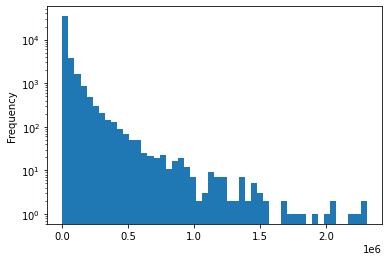

In [69]:
import matplotlib.pyplot as plt

ndf.length.plot(kind='hist', bins=50, logy=True)
plt.show()

In [22]:
ndf[ndf.length > 2e6].sort_values('length').iloc[::-1]

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,description,length
2309345,7,ensembl_havana,gene,146116002,148420998,.,+,.,CNTNAP2,ENSG00000174469,contactin associated protein-like 2 [Source:HG...,2304997
2422510,9,ensembl_havana,gene,8314246,10612723,.,-,.,PTPRD,ENSG00000153707,protein tyrosine phosphatase%2C receptor type ...,2298478
2527169,X,ensembl_havana,gene,31097677,33339441,.,-,.,DMD,ENSG00000198947,dystrophin [Source:HGNC Symbol%3BAcc:HGNC:2928],2241765
440886,11,ensembl_havana,gene,83455012,85627922,.,-,.,DLG2,ENSG00000150672,discs large MAGUK scaffold protein 2 [Source:H...,2172911
2323457,8,ensembl_havana,gene,2935353,4994972,.,-,.,CSMD1,ENSG00000183117,CUB and Sushi multiple domains 1 [Source:HGNC ...,2059620
1569914,20,ensembl_havana,gene,13995369,16053197,.,+,.,MACROD2,ENSG00000172264,MACRO domain containing 2 [Source:HGNC Symbol%...,2057829


In [71]:
ndf.sort_values('length').head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,description,length
682278,14,havana,gene,22438547,22438554,.,+,.,TRDD1,ENSG00000223997,T cell receptor delta diversity 1 [Source:HGNC...,8
682282,14,havana,gene,22439007,22439015,.,+,.,TRDD2,ENSG00000237235,T cell receptor delta diversity 2 [Source:HGNC...,9
2306836,7,havana,gene,142786213,142786224,.,+,.,TRBD1,ENSG00000282431,T cell receptor beta diversity 1 [Source:HGNC ...,12
682286,14,havana,gene,22449113,22449125,.,+,.,TRDD3,ENSG00000228985,T cell receptor delta diversity 3 [Source:HGNC...,13
1879625,4,havana,gene,10238213,10238235,.,-,.,AC006499.9,ENSG00000271544,,23


## Action item for the class: What are these short genes? Can you find some information and share with the class?

# Gene Distribution Among Chromosomes

The last thing I’d like to discuss is gene distribution among chromosomes, which also serves as an example for introducing the .merge method for combining two DataFrames. Intuitively, longer chromosomes likely host more genes. Is that really true?

In [63]:
chrs

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 'X',
 'Y',
 'MT']

In [64]:
ndf_chr = ndf[ndf.seqid.isin(chrs)]
ndf_chr

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,description,length
16,1,havana,gene,11869,14409,.,+,.,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Sym...,2541
28,1,havana,gene,14404,29570,.,-,.,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Sourc...,15167
71,1,havana,gene,52473,53312,.,+,.,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member...,840
74,1,havana,gene,62948,63887,.,+,.,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member...,940
77,1,ensembl_havana,gene,69091,70008,.,+,.,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member...,918
...,...,...,...,...,...,...,...,...,...,...,...,...
2601818,Y,havana,gene,26549425,26549743,.,+,.,CYCSP49,ENSG00000224240,cytochrome c%2C somatic pseudogene 49 [Source:...,319
2601821,Y,havana,gene,26586642,26591601,.,-,.,SLC25A15P1,ENSG00000227629,solute carrier family 25 member 15 pseudogene ...,4960
2601826,Y,havana,gene,26594851,26634652,.,-,.,PARP4P1,ENSG00000237917,poly(ADP-ribose) polymerase family member 4 ps...,39802
2601841,Y,havana,gene,26626520,26627159,.,-,.,FAM58CP,ENSG00000231514,family with sequence similarity 58 member C%2C...,640


In [65]:
print("dataframe for the gene entries", ndf.shape)
print("dataframe for the gene entries associated with chromosomes only", ndf_chr.shape)
ndf.shape == ndf_chr.shape

dataframe for the gene entries (42470, 12)
dataframe for the gene entries associated with chromosomes only (42439, 12)


False

In [67]:
ndf.seqid.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000009.2', 'GL000194.1', 'GL000195.1', 'GL000205.2',
       'GL000213.1', 'GL000218.1', 'GL000219.1', 'KI270711.1',
       'KI270713.1', 'KI270721.1', 'KI270726.1', 'KI270727.1',
       'KI270728.1', 'KI270731.1', 'KI270734.1', 'X', 'Y'], dtype=object)

In [66]:
chr_gene_counts = ndf.groupby('seqid').count().iloc[:, 0].sort_values().iloc[::-1]
chr_gene_counts #what happened to MT values?

seqid
1             3902
2             2806
11            2561
19            2412
17            2280
3             2204
6             2154
12            2140
7             2106
5             2002
16            1881
X             1852
4             1751
9             1659
8             1628
10            1600
15            1476
14            1449
22             996
20             965
13             872
18             766
21             541
Y              436
KI270728.1       8
KI270727.1       4
KI270734.1       3
KI270713.1       2
KI270726.1       2
GL000194.1       2
GL000195.1       2
GL000219.1       1
KI270721.1       1
GL000009.2       1
GL000205.2       1
GL000213.1       1
KI270731.1       1
GL000218.1       1
KI270711.1       1
Name: source, dtype: int64

### Action item for class: How does the groupby function work?

### Action item for class: What happened to the MT entries? How can we get them back? Hint: Look at the df

In [53]:
df[df.seqid ==  'MT'].source.unique()

array(['GRCh38', 'insdc', 'ensembl', '.'], dtype=object)

In [56]:
ndf.seqid.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000009.2', 'GL000194.1', 'GL000195.1', 'GL000205.2',
       'GL000213.1', 'GL000218.1', 'GL000219.1', 'KI270711.1',
       'KI270713.1', 'KI270721.1', 'KI270726.1', 'KI270727.1',
       'KI270728.1', 'KI270731.1', 'KI270734.1', 'X', 'Y'], dtype=object)

In [76]:
gdf

,seqid,source,type,length
0,1,GRCh38,chromosome,248956422
235068,10,GRCh38,chromosome,133797422
328938,11,GRCh38,chromosome,135086622
483370,12,GRCh38,chromosome,133275309
634486,13,GRCh38,chromosome,114364328
674767,14,GRCh38,chromosome,107043718
767312,15,GRCh38,chromosome,101991189
865053,16,GRCh38,chromosome,90338345
990810,17,GRCh38,chromosome,83257441
1155977,18,GRCh38,chromosome,80373285


In [78]:
print(len(df)) #GFF3 dataset
print(len(gdf_ori)) #GFF3 dataset but only returning those entries that match to GRCh38
print(len(edf)) # GFF3 dataset but only returning entries from source ensembl, havana and ensembl_havana
print(len(ndf_ori)) # GFF3 dataset with type gene, and only returning entries from source ensembl, havana and ensembl_havana

2601849
194
2414370
42470


In [ ]:
df

In [91]:
df[(df.seqid == 'MT')]

,seqid,source,type,start,end,score,strand,phase,attributes
2513999,MT,GRCh38,chromosome,1,16569,.,.,.,"ID=chromosome:MT;Alias=chrM,J01415.2,NC_012920.1"
2514000,MT,insdc,mt_gene,577,647,.,+,.,ID=gene:ENSG00000210049;Name=MT-TF;biotype=Mt_...
2514001,MT,insdc,transcript,577,647,.,+,.,ID=transcript:ENST00000387314;Parent=gene:ENSG...
2514002,MT,ensembl,exon,577,647,.,+,.,Parent=transcript:ENST00000387314;Name=ENSE000...
2514003,MT,insdc,gene,648,1601,.,+,.,ID=gene:ENSG00000211459;Name=MT-RNR1;biotype=M...
...,...,...,...,...,...,...,...,...,...
2514120,MT,insdc,transcript,15888,15953,.,+,.,ID=transcript:ENST00000387460;Parent=gene:ENSG...
2514121,MT,ensembl,exon,15888,15953,.,+,.,Parent=transcript:ENST00000387460;Name=ENSE000...
2514122,MT,insdc,mt_gene,15956,16023,.,-,.,ID=gene:ENSG00000210196;Name=MT-TP;biotype=Mt_...
2514123,MT,insdc,transcript,15956,16023,.,-,.,ID=transcript:ENST00000387461;Parent=gene:ENSG...


In [83]:
# df.source.value_counts()

havana            1441093
ensembl_havana     745065
ensembl            228212
.                  182510
mirbase              4701
GRCh38                194
insdc                  74
Name: source, dtype: int64

In [95]:
edf_MT = edf[edf.seqid == 'MT']
edf_MT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2514002 to 2514124
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seqid       50 non-null     object
 1   source      50 non-null     object
 2   type        50 non-null     object
 3   start       50 non-null     int64 
 4   end         50 non-null     int64 
 5   score       50 non-null     object
 6   strand      50 non-null     object
 7   phase       50 non-null     object
 8   attributes  50 non-null     object
dtypes: int64(2), object(7)
memory usage: 3.9+ KB


In [118]:
gdf_chr = gdf[gdf.seqid.isin(chrs)] # you can also decide to make a copy, instead of using the df directly
gdf_chr.drop(['start', 'end', 'score', 'strand', 'phase' ,'attributes'], axis=1, inplace=True)
gdf_chr.sort_values('length').iloc[::-1]

/usr/local/lib64/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,seqid,source,type,length
0,1,GRCh38,chromosome,248956422
1364641,2,GRCh38,chromosome,242193529
1705855,3,GRCh38,chromosome,198295559
1864567,4,GRCh38,chromosome,190214555
1964921,5,GRCh38,chromosome,181538259
2080148,6,GRCh38,chromosome,170805979
2196981,7,GRCh38,chromosome,159345973
2514125,X,GRCh38,chromosome,156040895
2321361,8,GRCh38,chromosome,145138636
2416560,9,GRCh38,chromosome,138394717


In [103]:
chr_gene_counts.head() 
#type(chr_gene_counts)

#not a pandas df, we can't merge datasets unless they are of the same data type

seqid
1     3902
2     2806
11    2561
19    2412
17    2280
Name: source, dtype: int64

In [106]:
cdf = chr_gene_counts.to_frame(name='gene_count').reset_index()
#.reset_index() converts the original index (i.e. seqid) into a new column and resets current index as 0-based incremental numbers.
cdf.head(2)
type(cdf)

pandas.core.frame.DataFrame

In [59]:
type(cdf) # now it is a pandas df

pandas.core.frame.DataFrame

In [119]:
gdf_chr.head()

,seqid,source,type,length
0,1,GRCh38,chromosome,248956422
235068,10,GRCh38,chromosome,133797422
328938,11,GRCh38,chromosome,135086622
483370,12,GRCh38,chromosome,133275309
634486,13,GRCh38,chromosome,114364328


In [120]:
merged = gdf_chr.merge(cdf, on='seqid')
merged

,seqid,source,type,length,gene_count
0,1,GRCh38,chromosome,248956422,3902
1,10,GRCh38,chromosome,133797422,1600
2,11,GRCh38,chromosome,135086622,2561
3,12,GRCh38,chromosome,133275309,2140
4,13,GRCh38,chromosome,114364328,872
5,14,GRCh38,chromosome,107043718,1449
6,15,GRCh38,chromosome,101991189,1476
7,16,GRCh38,chromosome,90338345,1881
8,17,GRCh38,chromosome,83257441,2280
9,18,GRCh38,chromosome,80373285,766


### Action item for class: how does merge function operate? Change the input for the how parameter and report back on the results.

# Is there a correlation between chromosome length and gene_count?

In [121]:
merged[['length', 'gene_count']].corr()

,length,gene_count
length,1.000000,0.728221
gene_count,0.728221,1.000000


In [125]:
import scipy
from scipy.stats import pearsonr
pearsonr(merged.length, merged.gene_count)

(0.7282208150479021, 5.478292401745804e-05)

In [127]:
help(scipy.stats.pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

### Action item for class: How does Pearson correlation work? What other correlation methods could you use? What other libraries can you use to look at correlation? Can you visualize the correlation?

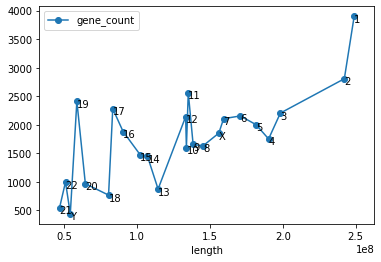

In [128]:
ax = merged[['length', 'gene_count']].sort_values('length').plot(x='length', y='gene_count', style='o-')
# add some margin to both ends of x axis
xlim = ax.get_xlim()
margin = xlim[0] * 0.1
ax.set_xlim([xlim[0] - margin, xlim[1] + margin])
# Label each point on the graph
for (s, x, y) in merged[['seqid', 'length', 'gene_count']].sort_values('length').values:
    ax.text(x, y - 100, str(s))

## Now your part!

In [130]:
mirdf = df[df.source == 'mirbase']
mirdf

,seqid,source,type,start,end,score,strand,phase,attributes
42,1,mirbase,miRNA_gene,17369,17436,.,-,.,ID=gene:ENSG00000278267;Name=MIR6859-1;biotype...
43,1,mirbase,miRNA,17369,17436,.,-,.,ID=transcript:ENST00000619216;Parent=gene:ENSG...
44,1,mirbase,exon,17369,17436,.,-,.,Parent=transcript:ENST00000619216;Name=ENSE000...
254,1,mirbase,miRNA_gene,187891,187958,.,-,.,ID=gene:ENSG00000273874;Name=MIR6859-2;biotype...
255,1,mirbase,miRNA,187891,187958,.,-,.,ID=transcript:ENST00000612080;Parent=gene:ENSG...
...,...,...,...,...,...,...,...,...,...
2594178,X,mirbase,miRNA,155383100,155383198,.,-,.,ID=transcript:ENST00000408263;Parent=gene:ENSG...
2594179,X,mirbase,exon,155383100,155383198,.,-,.,Parent=transcript:ENST00000408263;Name=ENSE000...
2594186,X,mirbase,miRNA_gene,155457517,155457615,.,+,.,ID=gene:ENSG00000221603;Name=MIR1184-3;biotype...
2594187,X,mirbase,miRNA,155457517,155457615,.,+,.,ID=transcript:ENST00000408676;Parent=gene:ENSG...


# Findings

### [More on correlations](https://realpython.com/numpy-scipy-pandas-correlation-python/)